<img src="pngegg.png">

### Import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset and some general information

In [3]:
covid = pd.read_csv ('COVID19BE.csv')
covid.head (5)

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
0,2020-03-01,Antwerpen,Flanders,40-49,M,1
1,2020-03-01,Brussels,Brussels,10-19,F,1
2,2020-03-01,Brussels,Brussels,10-19,M,1
3,2020-03-01,Brussels,Brussels,20-29,M,1
4,2020-03-01,Brussels,Brussels,30-39,F,1


In [4]:
covid.tail (5)

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
36023,NaN,VlaamsBrabant,Flanders,40-49,M,3
36024,NaN,VlaamsBrabant,Flanders,50-59,M,1
36025,NaN,WestVlaanderen,Flanders,20-29,F,1
36026,NaN,WestVlaanderen,Flanders,50-59,M,3
36027,NaN,NaN,NaN,NaN,NaN,1


In [5]:
covid.dropna (inplace= True)
covid.tail (5)

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
35974,2020-11-04,Brussels,Brussels,20-29,F,1
35975,2020-11-04,OostVlaanderen,Flanders,30-39,F,3
35976,2020-11-04,OostVlaanderen,Flanders,50-59,F,1
35977,2020-11-04,OostVlaanderen,Flanders,80-89,F,1
35978,2020-11-04,OostVlaanderen,Flanders,90+,F,2


In [7]:
covid.count ()

DATE        32628
PROVINCE    32628
REGION      32628
AGEGROUP    32628
SEX         32628
CASES       32628
dtype: int64

### Pie chart

In [9]:
gender = covid.groupby ('SEX')
gender = gender['CASES'].agg(np.sum)
gender

SEX
F    252212
M    205714
Name: CASES, dtype: int64

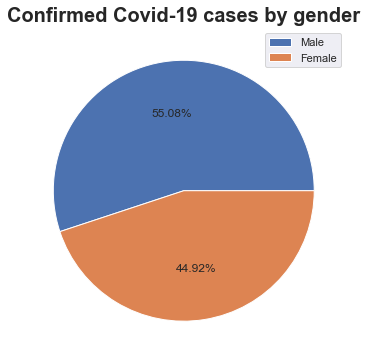

In [10]:
plt.figure (figsize = (10,6))

labels = ['Male', 'Female']

plt.pie(gender, autopct = '%.2f%%')

plt.title ('Confirmed Covid-19 cases by gender', fontsize = 20, fontweight = 'bold')

plt.legend (labels)

plt.show ()

### Bar chart

In [11]:
province = covid.groupby('PROVINCE')
province = province['CASES'].agg(np.sum)
province = province.sort_values(ascending = False)
province

PROVINCE
Liège             76581
Hainaut           72757
Brussels          65011
Antwerpen         54850
OostVlaanderen    40586
VlaamsBrabant     36738
WestVlaanderen    33977
Namur             25997
Limburg           19411
BrabantWallon     19390
Luxembourg        12628
Name: CASES, dtype: int64

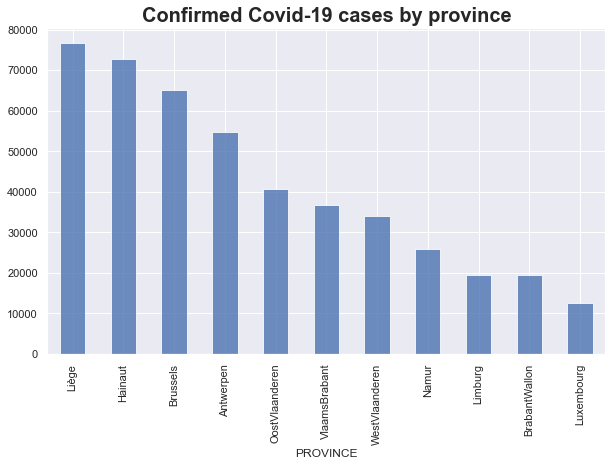

In [13]:
plt.figure(figsize = (10,6))

province.plot(kind = 'bar', alpha = .8)

plt.title ('Confirmed Covid-19 cases by province', fontsize = 20, fontweight = 'bold')

plt.show ()

### Timeserie

In [15]:
date = covid.groupby ('DATE')
date = date.agg(np.sum)
date['CUMSUM_C'] = date['CASES'].cumsum()
date

,CASES,CUMSUM_C
DATE,,
2020-03-01,19,19
2020-03-02,19,38
2020-03-03,34,72
2020-03-04,46,118
2020-03-05,81,199
...,...,...
2020-10-31,6053,437943
2020-11-01,2547,440490
2020-11-02,12337,452827


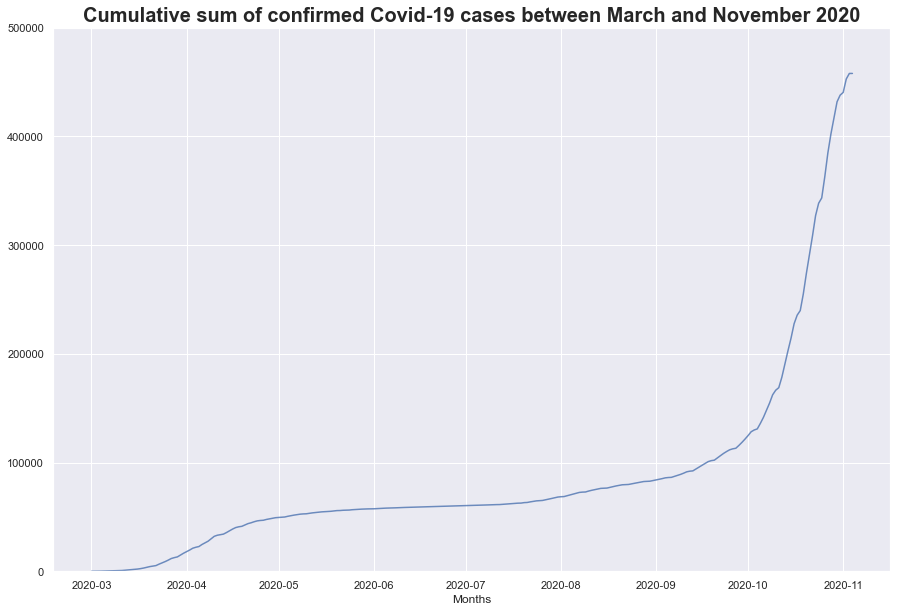

In [17]:
plt.figure (figsize = (15,10))

plt.plot (date['CUMSUM_C'], alpha = 0.8)

plt.title ('Cumulative sum of confirmed Covid-19 cases between March and November 2020', fontsize = 20, 
           fontweight = 'bold')

date.index = pd.to_datetime(date.index)
plt.xlabel ('Months')

plt.ylim (0,500000)

plt.show ()